## This code was generated using ChatGPT to explore the key concepts around correctmatch

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with 3 variables
num_samples = 1000
mean = [0, 0, 0]
cov_matrix = [[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]]
data = np.random.multivariate_normal(mean, cov_matrix, num_samples)
data

array([[-0.15501329, -0.77467862, -0.10731697],
       [-1.40430305, -1.19802723, -0.75554378],
       [-1.13968619, -0.94908987, -1.61103776],
       ...,
       [-0.5411659 , -0.38324317, -0.44384568],
       [ 0.89970042,  0.67934846,  0.54059039],
       [ 1.04729397,  1.18018064,  0.45956236]])

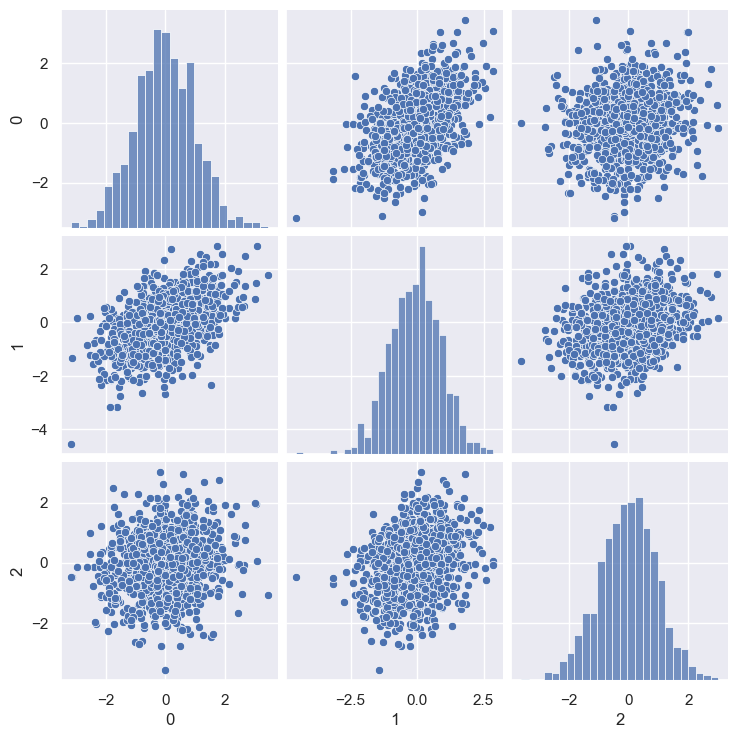

In [3]:
# Plot the scatter matrix to visualize relationships
sns.set()
df = pd.DataFrame(data)
sns.pairplot(df)
plt.show()

In [5]:
# Calculate empirical marginal distributions
marginal_distributions = [
    np.histogram(data[:, i], bins=20, density=True) for i in range(data.shape[1])
]
marginal_distributions

[(array([0.00903142, 0.00903142, 0.02709425, 0.06020945, 0.1204189 ,
         0.13848173, 0.22879591, 0.34620433, 0.37028811, 0.42146614,
         0.36426717, 0.28599488, 0.28298441, 0.12945031, 0.1204189 ,
         0.04214661, 0.02408378, 0.01806283, 0.00903142, 0.00301047]),
  array([-3.1778015 , -2.84562773, -2.51345395, -2.18128017, -1.8491064 ,
         -1.51693262, -1.18475884, -0.85258507, -0.52041129, -0.18823751,
          0.14393626,  0.47611004,  0.80828382,  1.14045759,  1.47263137,
          1.80480515,  2.13697892,  2.4691527 ,  2.80132648,  3.13350025,
          3.46567403])),
 (array([0.00269794, 0.        , 0.        , 0.00539587, 0.00269794,
         0.01618761, 0.05665665, 0.07284426, 0.16457407, 0.26439768,
         0.32914813, 0.39389858, 0.41818   , 0.35073161, 0.28058529,
         0.16996994, 0.09442774, 0.0377711 , 0.02428142, 0.01348968]),
  array([-4.54671045, -4.17605666, -3.80540288, -3.43474909, -3.06409531,
         -2.69344152, -2.32278774, -1.95213396, -

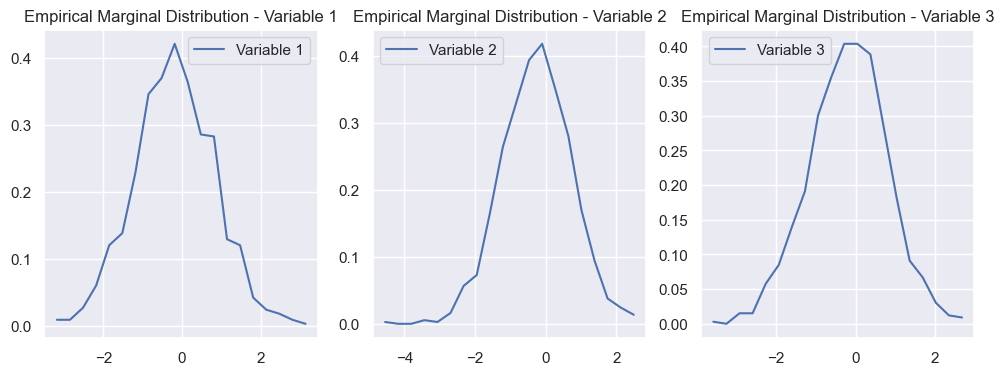

In [6]:
# Plot empirical marginal distributions
plt.figure(figsize=(12, 4))
for i in range(data.shape[1]):
    plt.subplot(1, data.shape[1], i + 1)
    plt.plot(
        marginal_distributions[i][1][:-1],
        marginal_distributions[i][0],
        label=f"Variable {i + 1}",
    )
    plt.title(f"Empirical Marginal Distribution - Variable {i + 1}")
    plt.legend()
plt.show()

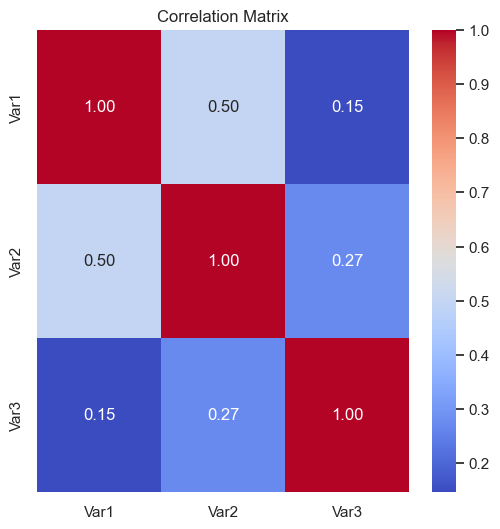

In [7]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)

# Plot the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=["Var1", "Var2", "Var3"],
    yticklabels=["Var1", "Var2", "Var3"],
)
plt.title("Correlation Matrix")
plt.show()

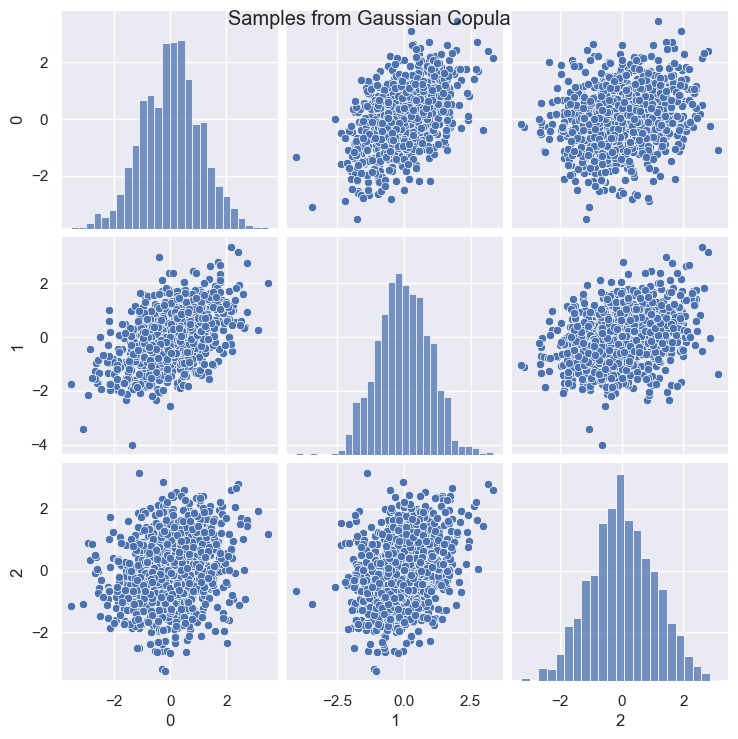

In [9]:
# Fit a Gaussian Copula model
gaussian_copula = multivariate_normal(mean=mean, cov=cov_matrix)
copula_samples = gaussian_copula.rvs(num_samples)

# Plot the scatter matrix for samples from the Gaussian Copula
copula_df = pd.DataFrame(copula_samples)
sns.pairplot(copula_df)
plt.suptitle("Samples from Gaussian Copula")
plt.show()


In [16]:
individual_attributes = np.array([0.8, 10, 2])

In [11]:
def compute_individual_uniqueness(mean, cov_matrix, individual_attributes):
    # Gaussian Copula with parameters learned from the dataset
    gaussian_copula = multivariate_normal(mean=mean, cov=cov_matrix)

    # Calculate the multivariate normal distribution for the individual's attributes
    individual_distribution = multivariate_normal.pdf(individual_attributes, mean, cov_matrix)

    # Calculate the copula density for the individual's attributes
    copula_density = gaussian_copula.pdf(norm.cdf(individual_attributes))

    # Compute individual uniqueness (product of multivariate normal and copula densities)
    individual_uniqueness = individual_distribution * copula_density

    return individual_uniqueness

In [17]:
uniqueness_score = compute_individual_uniqueness(mean, cov_matrix, individual_attributes)

print(f"Individual Uniqueness Score: {uniqueness_score}")

Individual Uniqueness Score: 3.0330055848754186e-30
